# Results

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/train.csv')
test = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/test.csv')

In [3]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [4]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [5]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Perform Model



In [6]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## NO Parameter Tuning

In [7]:
clf = DecisionTreeClassifier()
clf_params = clf.get_params()
print(clf_params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [8]:
clf.fit(X_train, y_train)
y_pred0 = clf.predict(X_test)
    
# calculate overall accuracty of the model
accuracy0 = metrics.accuracy_score(y_test, y_pred0)

print('Accuracy: ', accuracy0) 

Accuracy:  0.8605361384458772


## ccp_alpha Pruning

In [10]:
cdt = DecisionTreeClassifier(ccp_alpha = 0.0009793253536452668)

cdt.fit(X_train, y_train)
y_pred = cdt.predict(X_test)
    
# calculate overall accuracty of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy: ', accuracy)

Accuracy:  0.8808958262639973


## Confusion Matrix


In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print('\n {}'.format(cm))     

Confusion Matrix:

 [[537   0   0   0   0   0]
 [  0 376 115   0   0   0]
 [  0  54 478   0   0   0]
 [  0   0   0 473  16   7]
 [  0   0   0  19 354  47]
 [  0   0   0  69  24 378]]


### Plot Confusion Matrix

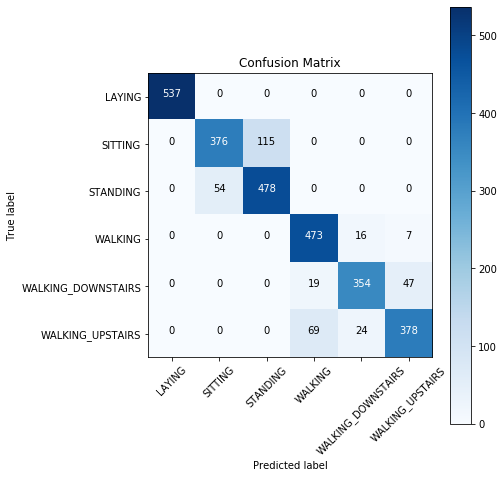

In [14]:
import itertools

plt.figure(figsize=(7,7))
plt.grid(b=False)

cmap = plt.cm.Blues
cm = cm.astype('int64')

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j]),
             horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Classification Report

In [16]:
print('| Classification Report |\n')
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

| Classification Report |

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.77      0.82       491
          STANDING       0.81      0.90      0.85       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.84      0.87       420
  WALKING_UPSTAIRS       0.88      0.80      0.84       471

          accuracy                           0.88      2947
         macro avg       0.88      0.88      0.88      2947
      weighted avg       0.88      0.88      0.88      2947

